<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Нужно построить модель с предельно большим значением *F1*-меры.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [ ]:
pip install pandas-profiling

     |████████████████████████████████| 324 kB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 344 kB 52.5 MB/s eta 0:00:01
     |████████████████████████████████| 679 kB 55.4 MB/s eta 0:00:01
     |████████████████████████████████| 296 kB 81.5 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 80.5 MB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 74.0 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 81.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 69.9 MB/s eta 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=c5ebe32e29c6bc74390253659305d57508401ecfff8472f37924f0bf8e009020
  Stored in directory: /home/jovyan/.cache/pip/wheels/1d/05/04/c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import ydata_profiling
pd.options.mode.chained_assignment = None

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import recall_score, precision_score
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_curve

import matplotlib.pyplot as plt

import numpy as np

import itertools

import seaborn as sns

In [ ]:
df = pd.read_csv('/datasets/Churn.csv')
df.head(3)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1

In [ ]:
profile = df.profile_report(title='Pandas Profiling Report', progress_bar=False)
profile

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
df.drop(['Surname', 'RowNumber', 'CustomerId'], axis=1, inplace=True)

One-hot encoding

In [ ]:
df_ohe = pd.get_dummies(df, drop_first=True)

In [ ]:
df_ohe.head(3)

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42     2.0       0.00              1          1   
1          608   41     1.0   83807.86              1          0   
2          502   42     8.0  159660.80              3          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1        101348.88       1                  0   
1               1        112542.58       0                  0   
2               0        113931.57       1                  0   

   Geography_Spain  Gender_Male  
0                0            0  
1                1            0  
2                0            0

Проверка на пропуски показала, что значение Tenure, сколько человек в банке в годах, имеет 909 пропусков.

In [ ]:
df_ohe.isna().sum()

CreditScore            0
Age                    0
Tenure               909
Balance                0
NumOfProducts          0
HasCrCard              0
IsActiveMember         0
EstimatedSalary        0
Exited                 0
Geography_Germany      0
Geography_Spain        0
Gender_Male            0
dtype: int64

Сложно предположить причину этих пропусков. Поэтому я заменю пропущенные значения заглушкой "0".

In [ ]:
df_ohe[df_ohe['Tenure'].isna()].head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
30          591   39     NaN       0.00              3          1   
48          550   38     NaN  103391.38              1          0   
51          585   36     NaN  146050.97              2          0   
53          655   41     NaN  125561.97              1          0   
60          742   35     NaN  136857.00              1          0   

    IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
30               0        140469.38       1                  0   
48               1         90878.13       0                  1   
51               0         86424.57       0                  1   
53               0        164040.94       1                  1   
60               0         84509.57       0                  1   

    Geography_Spain  Gender_Male  
30                1            0  
48                0            1  
51                0            1  
53                0            1  
60                0            1

In [ ]:
df_ohe['Tenure'] = df_ohe['Tenure'].fillna(0)

In [ ]:
df_ohe['Tenure'].isna().sum()

0

**Вывод:**

* удалил неинформативные столбцы — Surname, RowNumber, Geography;
* выполнил горячее кодирование категориальных признаков;
* заменил пропущенные значения в столбце Tenure на заглушку.

## Исследование задачи

Разделю датасет на 3 части — train, valid и test.

In [ ]:
def split_stratified_into_train_val_test(df_input, stratify_colname='y',
                                         frac_train=0.6, frac_val=0.20, frac_test=0.20,
                                         random_state=None):
    '''
    Функция разбивает датасет на три подмножества (train, val и test),
    где каждое подмножество стратифицировано по значениям в определенном столбце(target).

    Параметры:
    ----------
    df_input — датасет, который будем делить.
    stratify_colname — название столбца, который будет использоваться для стратификации.
    frac_train, frac_val и frac_test — соотношения, с которыми датасет
    будет разделен на train, val и test.
    random_state — значение, которое будет передано в train_test_split().

    Возвращается:
    -------
    df_train, df_val, df_test — необходимые выборки.
    '''

    if frac_train + frac_val + frac_test != 1.0:
        raise ValueError('fractions %f, %f, %f do not add up to 1.0' % \
                         (frac_train, frac_val, frac_test))

    if stratify_colname not in df_input.columns:
        raise ValueError('%s is not a column in the dataframe' % (stratify_colname))

    X = df_input # features
    y = df_input[[stratify_colname]] # target

    # датасет будет разделен в два этапа
    df_train, df_temp, y_train, y_temp = (
        train_test_split(
        X,
        y,
        stratify=y,
        test_size=(1.0 - frac_train),
        random_state=random_state
        )
    )

    relative_frac_test = frac_test / (frac_val + frac_test)

    df_val, df_test, y_val, y_test = (
        train_test_split(
        df_temp,
        y_temp,
        stratify=y_temp,
        test_size=relative_frac_test,
        random_state=random_state
        )
    )

    assert len(df_input) == len(df_train) + len(df_val) + len(df_test)

    return df_train, df_val, df_test

Таким образом получаю соотношения 3:1:1

In [ ]:
df_train, df_val, df_test = (
    split_stratified_into_train_val_test(
        df_ohe,
        stratify_colname='Exited',
        frac_train=.60, frac_val=.20, frac_test=.20,
        random_state=666
    )
)
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(6000, 12)
(2000, 12)
(2000, 12)


Теперь разделю каждую выборку на признаки.

In [ ]:
features_train = df_train.drop(['Exited'], axis=1)
target_train = df_train['Exited']

features_valid = df_val.drop(['Exited'], axis=1)
target_valid = df_val['Exited']

features_test = df_test.drop(['Exited'], axis=1)
target_test = df_test['Exited']

Столбцы с численными значениями имеют разный диапазон значений. Проведу масштабирование признаков.

In [ ]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance',
           'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Логистическая регрессия

In [ ]:
lr = LogisticRegression(random_state=666, solver='liblinear')
lr.fit(features_train, target_train)
predictions_lr = lr.predict(features_valid)

probabilities_valid = lr.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

Воспользуюсь функцией построения матрицы ошибок из документации sklearn

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1532   60]
 [ 315   93]]


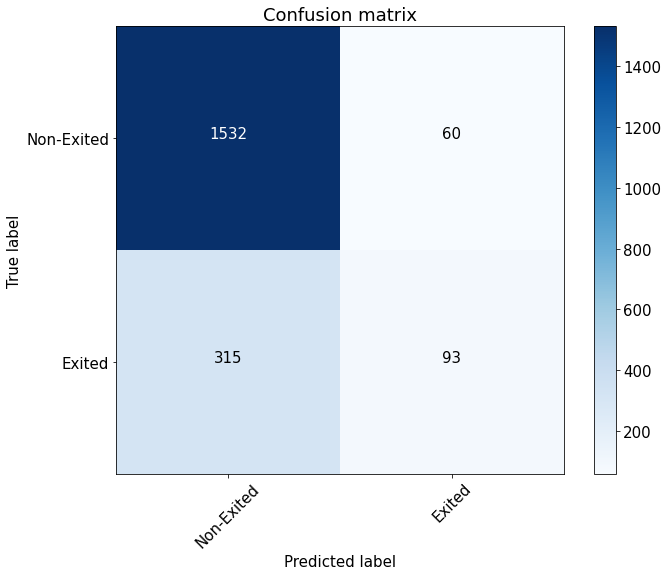

In [ ]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(target_valid, predictions_lr)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-Exited', 'Exited'],
                      title='Confusion matrix')
#plt.savefig("conf_matrix.png")
plt.show()

Метрики с базовыми гиперпараметрами:

In [ ]:
print("Recall:", recall_score(target_valid, predictions_lr))
print("Precision:", precision_score(target_valid, predictions_lr))
print("F1:", f1_score(target_valid, predictions_lr))
print("ROC_auc:", roc_auc_score(target_valid, probabilities_one_valid))

Recall: 0.22794117647058823
Precision: 0.6078431372549019
F1: 0.3315508021390374
ROC_auc: 0.7450056655828161


Подберу оптимальный порог для классификации:

In [ ]:
probabilities_valid = lr.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.62, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}".format(
        threshold, precision, recall, f1_score(target_valid, predicted_valid)))

Порог = 0.00 | Точность = 0.204, Полнота = 1.000, F1 = 0.339
Порог = 0.02 | Точность = 0.205, Полнота = 1.000, F1 = 0.340
Порог = 0.04 | Точность = 0.215, Полнота = 0.988, F1 = 0.353
Порог = 0.06 | Точность = 0.233, Полнота = 0.973, F1 = 0.376
Порог = 0.08 | Точность = 0.246, Полнота = 0.931, F1 = 0.389
Порог = 0.10 | Точность = 0.260, Полнота = 0.895, F1 = 0.403
Порог = 0.12 | Точность = 0.276, Полнота = 0.850, F1 = 0.417
Порог = 0.14 | Точность = 0.298, Полнота = 0.814, F1 = 0.436
Порог = 0.16 | Точность = 0.321, Полнота = 0.784, F1 = 0.456
Порог = 0.18 | Точность = 0.332, Полнота = 0.738, F1 = 0.458
Порог = 0.20 | Точность = 0.342, Полнота = 0.674, F1 = 0.454
Порог = 0.22 | Точность = 0.366, Полнота = 0.627, F1 = 0.462
Порог = 0.24 | Точность = 0.381, Полнота = 0.596, F1 = 0.465
Порог = 0.26 | Точность = 0.405, Полнота = 0.556, F1 = 0.469
Порог = 0.28 | Точность = 0.415, Полнота = 0.517, F1 = 0.460
Порог = 0.30 | Точность = 0.431, Полнота = 0.478, F1 = 0.453
Порог = 0.32 | Точность 

Случайный лес

Подберу оптимальные гиперпараметры:

In [ ]:
parameters = {
    'n_estimators' : [25,50,100,150],
    'criterion' : ['gini', 'entropy'],
    'max_depth':[5,10,20]
}

rfc = RandomForestClassifier(random_state=666)

clf_rfc = GridSearchCV(
    estimator = rfc,
    param_grid = parameters,
    scoring = 'f1',
    cv=5)

clf_rfc.fit(features_train, target_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=666),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20],
                         'n_estimators': [25, 50, 100, 150]},
             scoring='f1')

In [ ]:
model_base_rfc = clf_rfc.best_estimator_.fit(features_train, target_train)
predictions_rfc = model_base_rfc.predict(features_valid)

probabilities_valid = model_base_rfc.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

Confusion matrix, without normalization
[[1531   61]
 [ 227  181]]


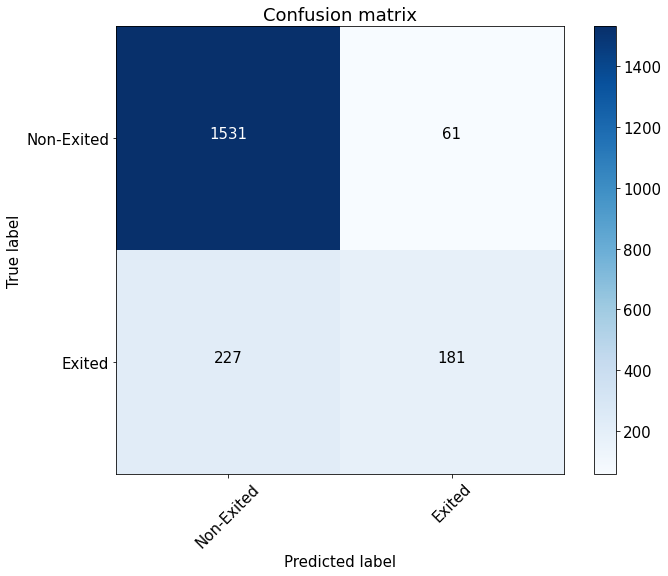

In [ ]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(target_valid, predictions_rfc)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-Exited', 'Exited'],
                      title='Confusion matrix')
#plt.savefig("conf_matrix.png")
plt.show()

In [ ]:
print("Recall:", recall_score(target_valid, predictions_rfc))
print("Precision:", precision_score(target_valid, predictions_rfc))
print("F1:", f1_score(target_valid, predictions_rfc))
print("ROC_auc:", roc_auc_score(target_valid, probabilities_one_valid))

Recall: 0.44362745098039214
Precision: 0.7479338842975206
F1: 0.556923076923077
ROC_auc: 0.8531259237363287


**Вывод:**

Базовая модель логистической регрессии на валидационной выборке показала результат по f1 и roc_auc 0.25 и 0.72.
При изменении порога классификации в логистической регрессии оптимальные значений метрик составляют Порог = 0.26 | Точность = 0.385, Полнота = 0.537, F1 = 0.448, ROC_auc = 0.72

Модель случайного леса на тестовых данных f1 и roc_auc соответственно 0.5 и 0.83.

Из-за несбалансированности данных у моделей полнота ниже, чем точность, это влияет на F-меру. У модели случайного леса метрики лучше, чем у логистической регрессии.

## Борьба с дисбалансом

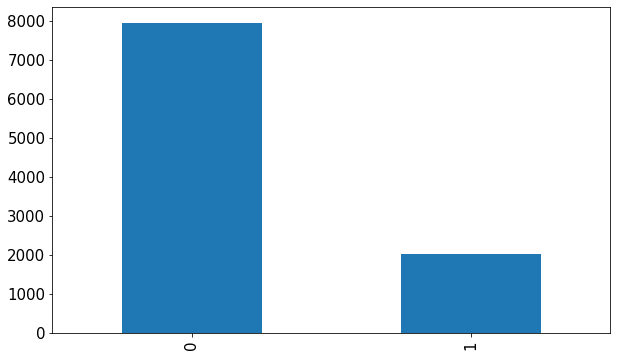

In [ ]:
df_ohe['Exited'].value_counts().plot(kind='bar',
                                     figsize=(10, 6))
plt.show()

Исследуемая метрика — отток клиентов, Exited. На графике виден дисбаланс классов.

Снова обучу логистическую регрессию, но установлю параметр баланса классов:

In [ ]:
model = LogisticRegression(random_state=666, solver='liblinear',class_weight = 'balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print("F1:", f1_score(target_valid, predicted_valid))
print("ROC_auc:", roc_auc_score(target_valid, probabilities_one_valid))

F1: 0.4742268041237113
ROC_auc: 0.7506481549906395


Рассчитаю оптимальный порог:

In [ ]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.62, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f} | Полнота = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1_score(target_valid, predicted_valid)))

Порог = 0.00 | Точность = 0.204 | Полнота = 1.000 | F1 = 0.339
Порог = 0.02 | Точность = 0.204 | Полнота = 1.000 | F1 = 0.339
Порог = 0.04 | Точность = 0.204 | Полнота = 1.000 | F1 = 0.339
Порог = 0.06 | Точность = 0.205 | Полнота = 1.000 | F1 = 0.340
Порог = 0.08 | Точность = 0.206 | Полнота = 1.000 | F1 = 0.342
Порог = 0.10 | Точность = 0.209 | Полнота = 0.995 | F1 = 0.345
Порог = 0.12 | Точность = 0.213 | Полнота = 0.995 | F1 = 0.350
Порог = 0.14 | Точность = 0.215 | Полнота = 0.988 | F1 = 0.354
Порог = 0.16 | Точность = 0.222 | Полнота = 0.978 | F1 = 0.362
Порог = 0.18 | Точность = 0.227 | Полнота = 0.978 | F1 = 0.369
Порог = 0.20 | Точность = 0.232 | Полнота = 0.966 | F1 = 0.374
Порог = 0.22 | Точность = 0.235 | Полнота = 0.946 | F1 = 0.377
Порог = 0.24 | Точность = 0.243 | Полнота = 0.941 | F1 = 0.386
Порог = 0.26 | Точность = 0.249 | Полнота = 0.929 | F1 = 0.393
Порог = 0.28 | Точность = 0.256 | Полнота = 0.914 | F1 = 0.400
Порог = 0.30 | Точность = 0.259 | Полнота = 0.887 | F1 

Посмотрим, как изменилась матрица после балансировки классов:

Confusion matrix, without normalization
[[1297  295]
 [ 193  215]]


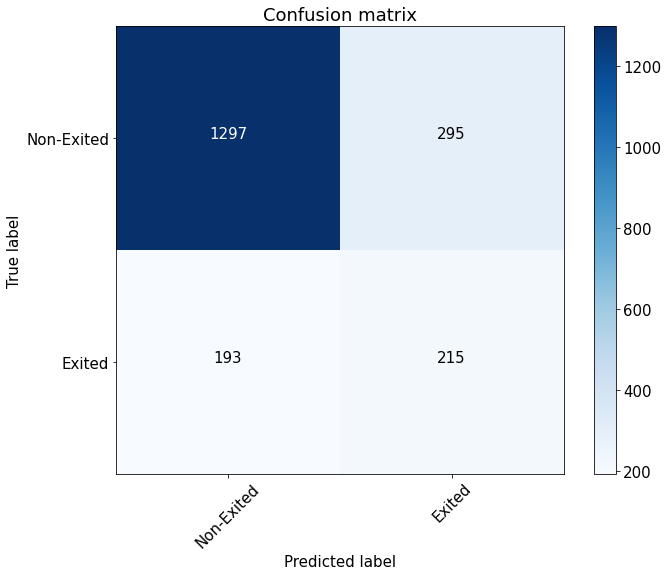

In [ ]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(target_valid, predicted_valid)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-Exited', 'Exited'],
                      title='Confusion matrix')
plt.show()

Обучу модель случайного леса с лучшими параметрами и балансом классов:

In [ ]:
parameters = {
    'n_estimators' : [25,50,100,150],
    'criterion' : ['gini', 'entropy'],
    'max_depth':[5,10,20],
    'class_weight' : ['balanced']
}

rfc = RandomForestClassifier(random_state=666)

rfc_balanced = GridSearchCV(
    estimator = rfc,
    param_grid = parameters,
    scoring = 'f1',
    cv=5)

rfc_balanced.fit(features_train, target_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=666),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20],
                         'n_estimators': [25, 50, 100, 150]},
             scoring='f1')

In [ ]:
model_rfc_balanced = rfc_balanced.best_estimator_.fit(features_train, target_train)
predicted_valid = model_rfc_balanced.predict(features_valid)

probabilities_valid = model_rfc_balanced.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print("F1:", f1_score(target_valid, predicted_valid))
print("ROC_auc:", roc_auc_score(target_valid, probabilities_one_valid))

F1: 0.6047087980173482
ROC_auc: 0.857672246034092


Рассчитаю оптимальный порог:

In [ ]:
probabilities_valid = model_rfc_balanced.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.8, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | Точность = {:.3f} | Полнота = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1_score(target_valid, predicted_valid)))

Порог = 0.00 | Точность = 0.204 | Полнота = 1.000 | F1 = 0.339
Порог = 0.02 | Точность = 0.205 | Полнота = 1.000 | F1 = 0.340
Порог = 0.04 | Точность = 0.210 | Полнота = 1.000 | F1 = 0.347
Порог = 0.06 | Точность = 0.219 | Полнота = 0.998 | F1 = 0.359
Порог = 0.08 | Точность = 0.232 | Полнота = 0.995 | F1 = 0.377
Порог = 0.10 | Точность = 0.246 | Полнота = 0.993 | F1 = 0.394
Порог = 0.12 | Точность = 0.258 | Полнота = 0.990 | F1 = 0.409
Порог = 0.14 | Точность = 0.273 | Полнота = 0.980 | F1 = 0.427
Порог = 0.16 | Точность = 0.287 | Полнота = 0.963 | F1 = 0.442
Порог = 0.18 | Точность = 0.299 | Полнота = 0.946 | F1 = 0.455
Порог = 0.20 | Точность = 0.313 | Полнота = 0.917 | F1 = 0.466
Порог = 0.22 | Точность = 0.330 | Полнота = 0.904 | F1 = 0.483
Порог = 0.24 | Точность = 0.351 | Полнота = 0.897 | F1 = 0.504
Порог = 0.26 | Точность = 0.367 | Полнота = 0.880 | F1 = 0.518
Порог = 0.28 | Точность = 0.388 | Полнота = 0.858 | F1 = 0.534
Порог = 0.30 | Точность = 0.409 | Полнота = 0.846 | F1 

После балансировки классов метрики на обоих моделях улучшили результаты.

Для логистической регресии — Порог = 0.52 | Точность = 0.360 | Полнота = 0.635 | F1 = 0.459 | ROC_auc = 0.730

Для случайного леса — Порог = 0.42 | Точность = 0.500 | Полнота = 0.676 | F1 = 0.575 | ROC_auc = 0.838

Upsampling

In [ ]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled

In [ ]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

probabilities_valid_lr = lr.predict_proba(features_valid)
probabilities_one_valid_lr = probabilities_valid_lr[:, 1]

probabilities_valid_rfc = model_base_rfc.predict_proba(features_valid)
probabilities_one_valid_rfc = probabilities_valid_rfc[:, 1]

lr.fit(features_upsampled, target_upsampled)
predicted_valid_lr = lr.predict(features_valid)
rfc.fit(features_upsampled, target_upsampled)
predicted_valid_rfc = rfc.predict(features_valid)

print(target_upsampled.value_counts())
print("F1 для логистической регрессии:", f1_score(target_valid, predicted_valid_lr))
print("Roc auc для логистической регрессии:", roc_auc_score(target_valid, probabilities_one_valid_lr))
print("F1 для случайного леса:", f1_score(target_valid, predicted_valid_rfc))
print("Roc auc для случайного леса:", roc_auc_score(target_valid, probabilities_one_valid_rfc))

1    4888
0    4778
Name: Exited, dtype: int64
F1 для логистической регрессии: 0.47198641765704585
Roc auc для логистической регрессии: 0.7450056655828161
F1 для случайного леса: 0.5919778699861687
Roc auc для случайного леса: 0.8531259237363287


Downsampling

In [ ]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = shuffle(pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones]), random_state=12345)
    target_downsampled = shuffle(pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones]), random_state=12345)

    return features_downsampled, target_downsampled

In [ ]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

probabilities_valid_lr = lr.predict_proba(features_valid)
probabilities_one_valid_lr = probabilities_valid_lr[:, 1]

probabilities_valid_rfc = model_base_rfc.predict_proba(features_valid)
probabilities_one_valid_rfc = probabilities_valid_rfc[:, 1]


lr.fit(features_downsampled, target_downsampled)
predicted_valid_lr = lr.predict(features_valid)
rfc.fit(features_downsampled, target_downsampled)
predicted_valid_rfc = rfc.predict(features_valid)

print(target_downsampled.value_counts())
print("F1 для логистической регрессии:", f1_score(target_valid, predicted_valid_lr))
print("Roc auc для логистической регрессии:", roc_auc_score(target_valid, probabilities_one_valid_lr))
print("F1 для случайного леса:", f1_score(target_valid, predicted_valid_rfc))
print("Roc auc для случайного леса:", roc_auc_score(target_valid, probabilities_one_valid_rfc))

0    1433
1    1222
Name: Exited, dtype: int64
F1 для логистической регрессии: 0.4896810506566604
Roc auc для логистической регрессии: 0.7506835648832398
F1 для случайного леса: 0.5932914046121592
Roc auc для случайного леса: 0.8531259237363287


Наилучшего баланса классов при увеличения выборки удалось получить с repeat = 4:

* F1 для логистической регрессии: 0.4351851851851851
* Roc auc для логистической регрессии: 0.6434978199822643
* F1 для случайного леса: 0.5922865013774106
* Roc auc для случайного леса: 0.8525616747955463

Наилучшего баланса классов при уменьшении выборки удалось получить с fraction = 0.3:

* F1 для логистической регрессии: 0.4609595484477893
* Roc auc для логистической регрессии: 0.6714762538181103
* F1 для случайного леса: 0.5443037974683543
* Roc auc для случайного леса: 0.7276086313922554

Увеличение выборки при дисбалансе классов дало лучшие результаты, чем уменьшение. Но эти метрики значительно уступают, если устанавливать параметр баланс классов и не проводить манипуляции с выборками.

## Тестирование модели

Итак, лучше всего себя показала модель случайного леса с балансировкой классов. Проверю ее на тестовой выборке.

In [ ]:
probabilities_test = model_rfc_balanced.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

threshold = 0.42

predicted_test = probabilities_one_test > threshold
precision = precision_score(target_test, predicted_test)
recall = recall_score(target_test, predicted_test)

print("Порог = {:.2f} | Точность = {:.3f} | Полнота = {:.3f} | F1 = {:.3f}".format(
    threshold, precision, recall, f1_score(target_test, predicted_test)))

Порог = 0.42 | Точность = 0.529 | Полнота = 0.715 | F1 = 0.608


In [ ]:
print("Roc auc = ", roc_auc_score(target_test, probabilities_one_test))

Roc auc =  0.8543165661809727


Модель на тестовой выборке показала результаты аналогичные валидационной:

Порог = 0.42 | Точность = 0.529 | Полнота = 0.715 | F1 = 0.608 | Roc auc = 0.854

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

<Figure size 432x288 with 0 Axes>

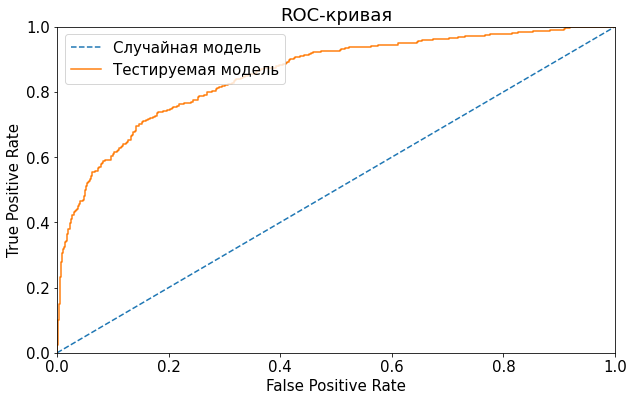

In [ ]:
plt.figure()

plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','Тестируемая модель'),
           loc= 'upper left')
plt.show()

**Вывод:**
* лучшая модель — RandomForestClassifier
* модели со сбалансированными классами дали лучшие результаты, чем увеличение и уменьшение выборок
* финальная модель превысила рекомендуемое значение F1-меры и равна — 0.602